# Laboratorio 2

## Librerias y data comun de prueba

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [ ]:
# Configuración para mostrar gráficos en Jupyter Notebook
%matplotlib inline

In [ ]:
# Cargar el conjunto de datos Iris
data = load_iris()
X = data.data
y = data.target


In [ ]:
# Convertir las etiquetas a formato one-hot encoding
y = to_categorical(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Crear el modelo MLP con Dropout
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dropout(0.5))  # Dropout con tasa del 50%
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))


In [ ]:

# Resumen del modelo
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 10)                50        
                                                                 
 dropout_18 (Dropout)        (None, 10)                0         
                                                                 
 dense_28 (Dense)            (None, 10)                110       
                                                                 
 dropout_19 (Dropout)        (None, 10)                0         
                                                                 
 dense_29 (Dense)            (None, 3)                 33        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

## Desafio 1:  Cambiar la Tasa de Aprendizaje del Optimizador Adam

### 1. Cambie la tasa de aprendizaje a 0.01:


In [ ]:
from tensorflow.keras.optimizers import Adam
learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)

# Compilar el modelo
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

#### Entrenamiento de modelo

In [ ]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.1)

Epoch 1/50
22/22 [==============================] - 2s 13ms/step - loss: 3.9306 - accuracy: 0.3519 - val_loss: 1.0655 - val_accuracy: 0.5833
Epoch 2/50
22/22 [==============================] - 0s 4ms/step - loss: 1.3904 - accuracy: 0.2685 - val_loss: 1.0350 - val_accuracy: 0.4167
Epoch 3/50
22/22 [==============================] - 0s 4ms/step - loss: 1.0754 - accuracy: 0.3519 - val_loss: 1.0638 - val_accuracy: 0.5833
Epoch 4/50
22/22 [==============================] - 0s 4ms/step - loss: 1.0958 - accuracy: 0.4167 - val_loss: 1.0551 - val_accuracy: 0.5833
Epoch 5/50
22/22 [==============================] - 0s 4ms/step - loss: 1.0327 - accuracy: 0.5185 - val_loss: 1.0119 - val_accuracy: 0.5833
Epoch 6/50
22/22 [==============================] - 0s 4ms/step - loss: 0.9860 - accuracy: 0.4815 - val_loss: 0.9513 - val_accuracy: 0.5833
Epoch 7/50
22/22 [==============================] - 0s 4ms/step - loss: 0.9985 - accuracy: 0.4352 - val_loss: 0.8964 - val_accuracy: 0.5833
Epoch 8/50
22/22 [=


#### Evaluación del Modelo

Evaluaremos el rendimiento del modelo utilizando los datos de prueba.



In [ ]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')


1/1 [==============================] - 0s 27ms/step - loss: 0.4208 - accuracy: 0.7000
Precisión en el conjunto de prueba: 70.00%


In [ ]:

# Guardar el modelo
model.save('mlp_model_dropout.h5')

# Cargar el modelo
from tensorflow.keras.models import load_model
model = load_model('mlp_model_dropout.h5')


#### Visualización de Resultados

Visualizamos la precisión y la pérdida durante el entrenamiento para entender mejor el rendimiento del modelo.


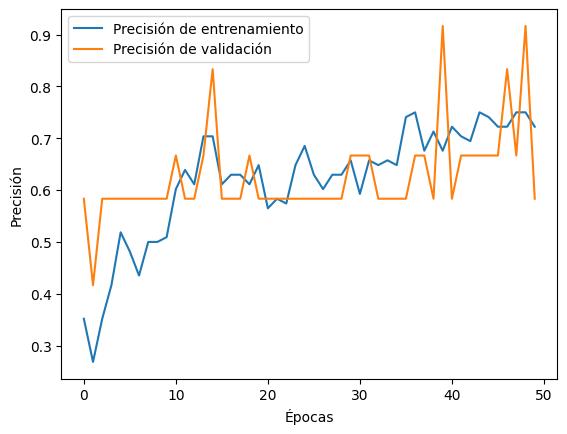

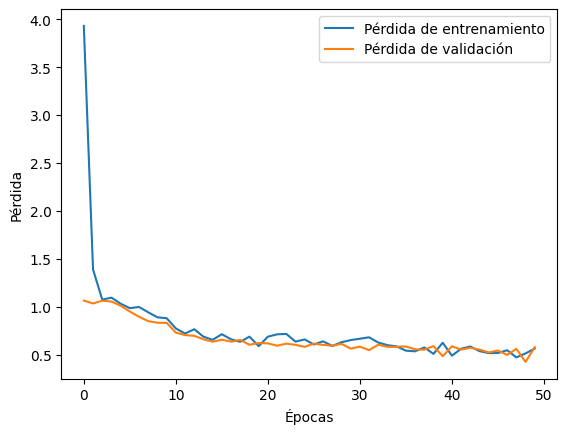

In [ ]:
# Graficar la precisión
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


### 2. Cambie la tasa de aprendizaje a 0.0001:

In [ ]:
learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)

# Compilar el modelo
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

#### Entrenamiento de modelo

In [ ]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.1)

Epoch 1/50
22/22 [==============================] - 1s 15ms/step - loss: 0.5532 - accuracy: 0.7037 - val_loss: 0.5776 - val_accuracy: 0.5833
Epoch 2/50
22/22 [==============================] - 0s 5ms/step - loss: 0.5340 - accuracy: 0.7500 - val_loss: 0.5741 - val_accuracy: 0.5833
Epoch 3/50
22/22 [==============================] - 0s 3ms/step - loss: 0.5703 - accuracy: 0.7037 - val_loss: 0.5696 - val_accuracy: 0.5833
Epoch 4/50
22/22 [==============================] - 0s 5ms/step - loss: 0.5625 - accuracy: 0.7130 - val_loss: 0.5663 - val_accuracy: 0.5833
Epoch 5/50
22/22 [==============================] - 0s 4ms/step - loss: 0.5834 - accuracy: 0.6574 - val_loss: 0.5633 - val_accuracy: 0.6667
Epoch 6/50
22/22 [==============================] - 0s 4ms/step - loss: 0.5926 - accuracy: 0.7037 - val_loss: 0.5603 - val_accuracy: 0.6667
Epoch 7/50
22/22 [==============================] - 0s 4ms/step - loss: 0.5201 - accuracy: 0.7685 - val_loss: 0.5574 - val_accuracy: 0.6667
Epoch 8/50
22/22 [=


#### Evaluación del Modelo

Evaluaremos el rendimiento del modelo utilizando los datos de prueba.



In [ ]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')


1/1 [==============================] - 0s 33ms/step - loss: 0.3438 - accuracy: 0.9000
Precisión en el conjunto de prueba: 90.00%


#### Visualización de Resultados

Visualizamos la precisión y la pérdida durante el entrenamiento para entender mejor el rendimiento del modelo.


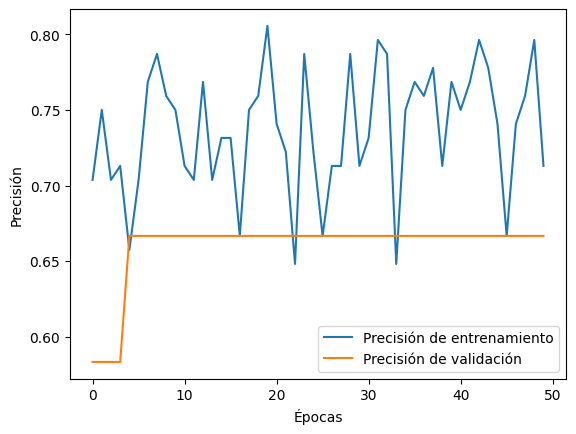

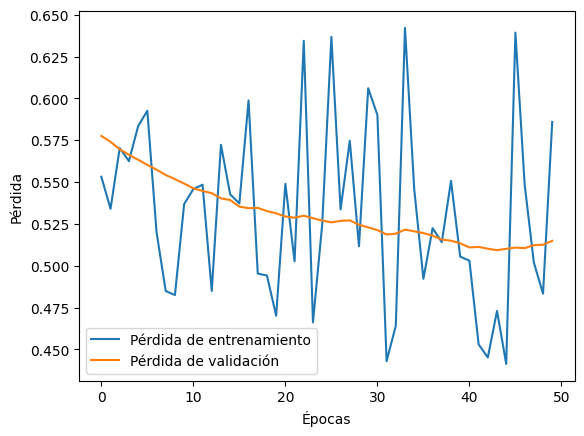

In [ ]:
# Graficar la precisión
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


### **Pregunta:**
- ¿Cómo afecta cada cambio en la tasa de aprendizaje a la precisión y la pérdida del modelo durante el entrenamiento y la validación?

Al reducir la tasa de aprendizaje, la precisión del modelo tiende a aumentar de un 70% a un 90%, y la pérdida disminuye de 0.4 a 0.3. Esto se debe a que una tasa de aprendizaje más baja permite que el modelo realice ajustes más finos en los pesos, convergiendo de manera más estable hacia un mínimo local de la función de pérdida. Sin embargo, una tasa de aprendizaje demasiado baja podría hacer que el proceso de entrenamiento sea mucho más lento.

## Desafío 2: Modificar el Número de Neuronas en las Capas Ocultas

### 1 -Cambie el número de neuronas a 256 en cada capa oculta:

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

In [ ]:
# Crear el modelo MLP con Dropout
model = Sequential()
model.add(Dense(256, input_dim=4, activation='relu'))
model.add(Dropout(0.5))  # Dropout con tasa del 50%
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))


In [ ]:

# Resumen del modelo
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 256)               1280      
                                                                 
 dropout_20 (Dropout)        (None, 256)               0         
                                                                 
 dense_31 (Dense)            (None, 256)               65792     
                                                                 
 dropout_21 (Dropout)        (None, 256)               0         
                                                                 
 dense_32 (Dense)            (None, 3)                 771       
                                                                 
Total params: 67843 (265.01 KB)
Trainable params: 67843 (265.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.1)


Epoch 1/50
22/22 [==============================] - 1s 16ms/step - loss: 1.1625 - accuracy: 0.4074 - val_loss: 0.8329 - val_accuracy: 0.5833
Epoch 2/50
22/22 [==============================] - 0s 5ms/step - loss: 0.7538 - accuracy: 0.7315 - val_loss: 0.6004 - val_accuracy: 0.5833
Epoch 3/50
22/22 [==============================] - 0s 4ms/step - loss: 0.6245 - accuracy: 0.7037 - val_loss: 0.5177 - val_accuracy: 0.5833
Epoch 4/50
22/22 [==============================] - 0s 6ms/step - loss: 0.5297 - accuracy: 0.7500 - val_loss: 0.4750 - val_accuracy: 0.6667
Epoch 5/50
22/22 [==============================] - 0s 7ms/step - loss: 0.4803 - accuracy: 0.7685 - val_loss: 0.4508 - val_accuracy: 0.5833
Epoch 6/50
22/22 [==============================] - 0s 6ms/step - loss: 0.4011 - accuracy: 0.8148 - val_loss: 0.4942 - val_accuracy: 0.5833
Epoch 7/50
22/22 [==============================] - 0s 6ms/step - loss: 0.4793 - accuracy: 0.7593 - val_loss: 0.3495 - val_accuracy: 0.9167
Epoch 8/50
22/22 [=


#### Evaluación del Modelo

Evaluaremos el rendimiento del modelo utilizando los datos de prueba.



In [ ]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')


1/1 [==============================] - 0s 25ms/step - loss: 0.0884 - accuracy: 1.0000
Precisión en el conjunto de prueba: 100.00%


In [ ]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')


1/1 [==============================] - 0s 25ms/step - loss: 0.0884 - accuracy: 1.0000
Precisión en el conjunto de prueba: 100.00%


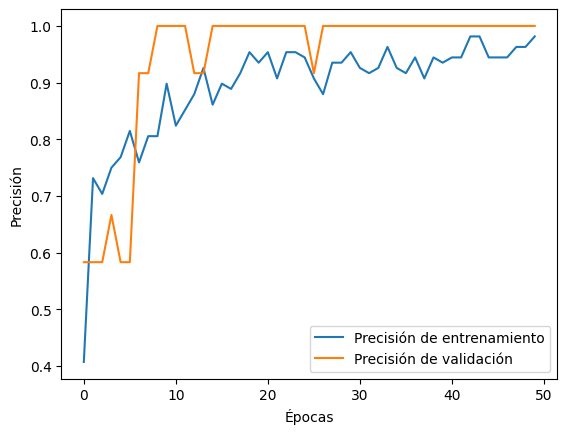

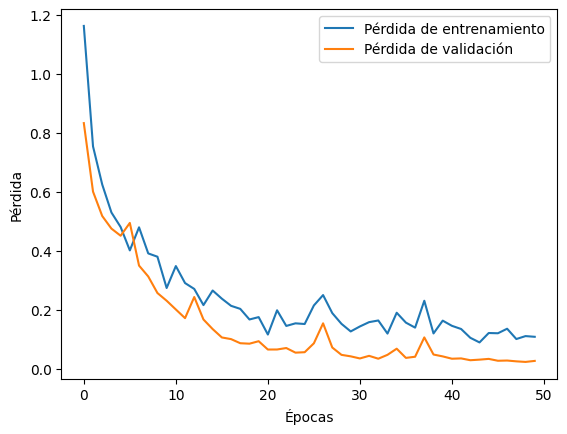

In [ ]:
# Graficar la precisión
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


### 2.Cambie el número de neuronas a 1024 en cada capa oculta:

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

In [ ]:
# Crear el modelo MLP con Dropout
model = Sequential()
model.add(Dense(1024, input_dim=4, activation='relu'))
model.add(Dropout(0.5))  # Dropout con tasa del 50%
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))


In [ ]:

# Resumen del modelo
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 1024)              5120      
                                                                 
 dropout_22 (Dropout)        (None, 1024)              0         
                                                                 
 dense_34 (Dense)            (None, 1024)              1049600   
                                                                 
 dropout_23 (Dropout)        (None, 1024)              0         
                                                                 
 dense_35 (Dense)            (None, 3)                 3075      
                                                                 
Total params: 1057795 (4.04 MB)
Trainable params: 1057795 (4.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.1)


Epoch 1/50
22/22 [==============================] - 2s 39ms/step - loss: 0.8933 - accuracy: 0.7037 - val_loss: 0.5461 - val_accuracy: 0.9167
Epoch 2/50
22/22 [==============================] - 1s 29ms/step - loss: 0.5970 - accuracy: 0.6759 - val_loss: 0.3789 - val_accuracy: 0.7500
Epoch 3/50
22/22 [==============================] - 1s 28ms/step - loss: 0.2893 - accuracy: 0.8519 - val_loss: 0.2337 - val_accuracy: 1.0000
Epoch 4/50
22/22 [==============================] - 0s 23ms/step - loss: 0.4385 - accuracy: 0.7870 - val_loss: 0.2884 - val_accuracy: 0.8333
Epoch 5/50
22/22 [==============================] - 0s 21ms/step - loss: 0.3408 - accuracy: 0.8426 - val_loss: 0.3166 - val_accuracy: 0.8333
Epoch 6/50
22/22 [==============================] - 0s 20ms/step - loss: 0.2393 - accuracy: 0.8704 - val_loss: 0.1143 - val_accuracy: 1.0000
Epoch 7/50
22/22 [==============================] - 0s 20ms/step - loss: 0.1852 - accuracy: 0.9167 - val_loss: 0.0688 - val_accuracy: 1.0000
Epoch 8/50
22


#### Evaluación del Modelo

Evaluaremos el rendimiento del modelo utilizando los datos de prueba.



In [ ]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')


1/1 [==============================] - 0s 39ms/step - loss: 0.1721 - accuracy: 0.9000
Precisión en el conjunto de prueba: 90.00%


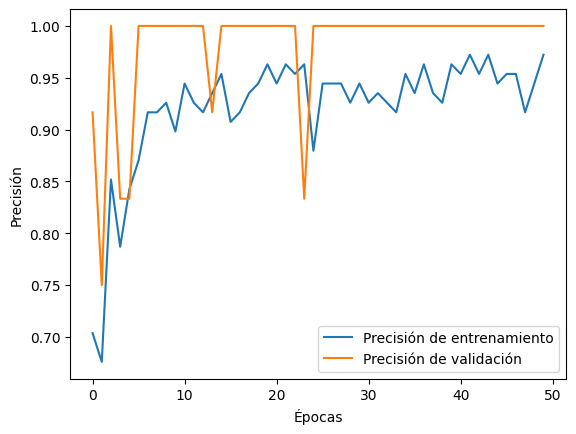

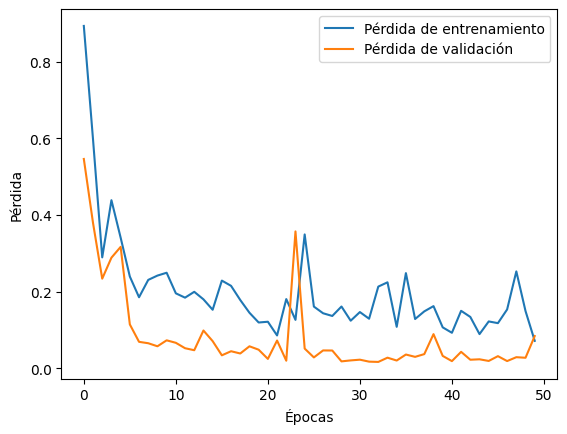

In [ ]:
# Graficar la precisión
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


### **Pregunta:**
- ¿Cómo cambia la precisión y la pérdida del modelo con diferentes números de neuronas en las capas ocultas?

Al aumentar el número de neuronas en las dos capas ocultas, observé una disminución en la precisión del modelo de un 100% a un 90% y un aumento en la pérdida. Esto puede deberse a que un mayor número de neuronas incrementa la complejidad del modelo, lo que puede llevar a sobreajuste si el modelo comienza a aprender ruido en los datos de entrenamiento en lugar de patrones útiles.

## Desafío 3: Cambiar la Cantidad de Épocas de Entrenamiento


### 1. Cambie el número de épocas a 10:

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

In [ ]:
# Crear el modelo MLP con Dropout
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dropout(0.5))  # Dropout con tasa del 50%
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))


In [ ]:

# Resumen del modelo
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 10)                50        
                                                                 
 dropout_24 (Dropout)        (None, 10)                0         
                                                                 
 dense_37 (Dense)            (None, 10)                110       
                                                                 
 dropout_25 (Dropout)        (None, 10)                0         
                                                                 
 dense_38 (Dense)            (None, 3)                 33        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=5, validation_split=0.1)


Epoch 1/10
22/22 [==============================] - 1s 12ms/step - loss: 1.7627 - accuracy: 0.3426 - val_loss: 1.1126 - val_accuracy: 0.3333
Epoch 2/10
22/22 [==============================] - 0s 5ms/step - loss: 1.7448 - accuracy: 0.3333 - val_loss: 1.0689 - val_accuracy: 0.5833
Epoch 3/10
22/22 [==============================] - 0s 4ms/step - loss: 1.7668 - accuracy: 0.3611 - val_loss: 1.0468 - val_accuracy: 0.5833
Epoch 4/10
22/22 [==============================] - 0s 3ms/step - loss: 1.5744 - accuracy: 0.4074 - val_loss: 1.0394 - val_accuracy: 0.5833
Epoch 5/10
22/22 [==============================] - 0s 4ms/step - loss: 1.4219 - accuracy: 0.3704 - val_loss: 1.0356 - val_accuracy: 0.5833
Epoch 6/10
22/22 [==============================] - 0s 4ms/step - loss: 1.4602 - accuracy: 0.3796 - val_loss: 1.0340 - val_accuracy: 0.5833
Epoch 7/10
22/22 [==============================] - 0s 3ms/step - loss: 1.3528 - accuracy: 0.3889 - val_loss: 1.0323 - val_accuracy: 0.5833
Epoch 8/10
22/22 [=


#### Evaluación del Modelo

Evaluaremos el rendimiento del modelo utilizando los datos de prueba.



In [ ]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')


1/1 [==============================] - 0s 25ms/step - loss: 1.0114 - accuracy: 0.7000
Precisión en el conjunto de prueba: 70.00%


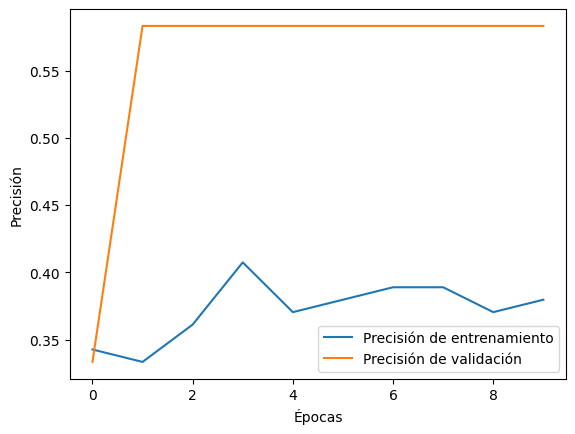

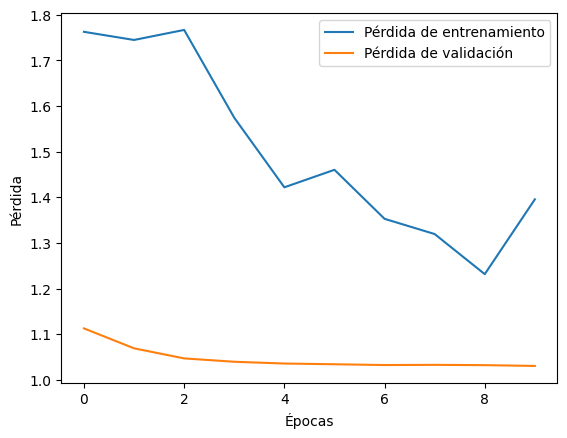

In [ ]:
# Graficar la precisión
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


### 2. Cambie el número de épocas a 30:

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

In [ ]:
# Crear el modelo MLP con Dropout
model = Sequential()
model.add(Dense(1024, input_dim=4, activation='relu'))
model.add(Dropout(0.5))  # Dropout con tasa del 50%
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))


In [ ]:

# Resumen del modelo
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 1024)              5120      
                                                                 
 dropout_26 (Dropout)        (None, 1024)              0         
                                                                 
 dense_40 (Dense)            (None, 1024)              1049600   
                                                                 
 dropout_27 (Dropout)        (None, 1024)              0         
                                                                 
 dense_41 (Dense)            (None, 3)                 3075      
                                                                 
Total params: 1057795 (4.04 MB)
Trainable params: 1057795 (4.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=30, batch_size=5, validation_split=0.1)


Epoch 1/30
22/22 [==============================] - 2s 44ms/step - loss: 1.2492 - accuracy: 0.5370 - val_loss: 0.8290 - val_accuracy: 0.5833
Epoch 2/30
22/22 [==============================] - 1s 26ms/step - loss: 0.5597 - accuracy: 0.7500 - val_loss: 0.4338 - val_accuracy: 1.0000
Epoch 3/30
22/22 [==============================] - 1s 27ms/step - loss: 0.5324 - accuracy: 0.7130 - val_loss: 0.5238 - val_accuracy: 0.5833
Epoch 4/30
22/22 [==============================] - 1s 26ms/step - loss: 0.5619 - accuracy: 0.7407 - val_loss: 0.6939 - val_accuracy: 0.5833
Epoch 5/30
22/22 [==============================] - 1s 27ms/step - loss: 0.5451 - accuracy: 0.7222 - val_loss: 0.2973 - val_accuracy: 1.0000
Epoch 6/30
22/22 [==============================] - 1s 26ms/step - loss: 0.2659 - accuracy: 0.9074 - val_loss: 0.2106 - val_accuracy: 1.0000
Epoch 7/30
22/22 [==============================] - 0s 20ms/step - loss: 0.2641 - accuracy: 0.8889 - val_loss: 0.3067 - val_accuracy: 0.8333
Epoch 8/30
22


#### Evaluación del Modelo

Evaluaremos el rendimiento del modelo utilizando los datos de prueba.



In [ ]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')


1/1 [==============================] - 0s 46ms/step - loss: 0.1957 - accuracy: 0.9000
Precisión en el conjunto de prueba: 90.00%


In [ ]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')


1/1 [==============================] - 0s 43ms/step - loss: 0.1957 - accuracy: 0.9000
Precisión en el conjunto de prueba: 90.00%


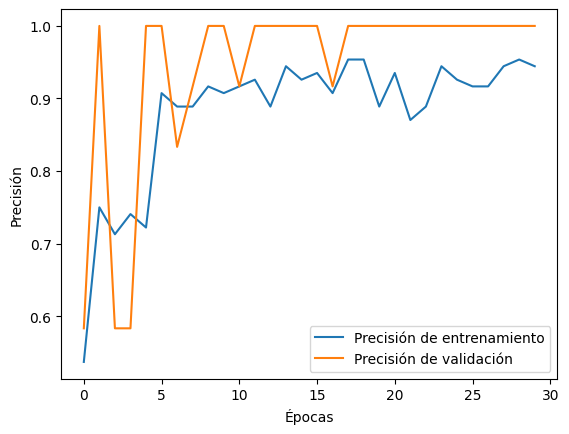

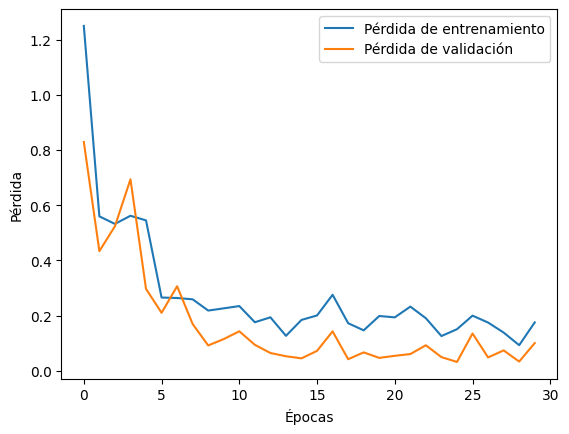

In [ ]:
# Graficar la precisión
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


### **Pregunta:**
- ¿Cómo afecta el número de épocas a la precisión y la pérdida del modelo durante el entrenamiento y la validación? ¿Observa algún signo de sobreajuste o subajuste?

Al aumentar el numero de epoca, tambien aumenta la precision del modelo y disminuye la perdida. Depende el problema puede haber un sobre ajuste, hasta el momento no creo que lo haya, porque aumento la precision de un 70 a un 90, pero tiende a que haya un sobre ajuste en el futuro.

## Desafío 4: Modificar la Función de Activación en las Capas Ocultas

### 1. Cambie la función de activación a `sigmoid`:

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

In [ ]:
# Crear el modelo MLP con Dropout
model = Sequential()
model.add(Dense(10, input_dim=4, activation='sigmoid'))
model.add(Dropout(0.5))  # Dropout con tasa del 50%
model.add(Dense(10, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))


In [ ]:

# Resumen del modelo
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 10)                50        
                                                                 
 dropout_28 (Dropout)        (None, 10)                0         
                                                                 
 dense_43 (Dense)            (None, 10)                110       
                                                                 
 dropout_29 (Dropout)        (None, 10)                0         
                                                                 
 dense_44 (Dense)            (None, 3)                 33        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=30, batch_size=5, validation_split=0.1)


Epoch 1/30
22/22 [==============================] - 1s 12ms/step - loss: 1.2517 - accuracy: 0.3148 - val_loss: 1.1699 - val_accuracy: 0.1667
Epoch 2/30
22/22 [==============================] - 0s 4ms/step - loss: 1.2742 - accuracy: 0.2870 - val_loss: 1.1573 - val_accuracy: 0.1667
Epoch 3/30
22/22 [==============================] - 0s 3ms/step - loss: 1.3268 - accuracy: 0.2778 - val_loss: 1.1419 - val_accuracy: 0.1667
Epoch 4/30
22/22 [==============================] - 0s 5ms/step - loss: 1.2213 - accuracy: 0.3333 - val_loss: 1.1316 - val_accuracy: 0.1667
Epoch 5/30
22/22 [==============================] - 0s 3ms/step - loss: 1.1115 - accuracy: 0.3889 - val_loss: 1.1273 - val_accuracy: 0.1667
Epoch 6/30
22/22 [==============================] - 0s 4ms/step - loss: 1.2372 - accuracy: 0.2685 - val_loss: 1.1250 - val_accuracy: 0.1667
Epoch 7/30
22/22 [==============================] - 0s 3ms/step - loss: 1.2031 - accuracy: 0.3426 - val_loss: 1.1219 - val_accuracy: 0.1667
Epoch 8/30
22/22 [=


#### Evaluación del Modelo

Evaluaremos el rendimiento del modelo utilizando los datos de prueba.



In [ ]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')


1/1 [==============================] - 0s 36ms/step - loss: 1.0393 - accuracy: 0.6000
Precisión en el conjunto de prueba: 60.00%


In [ ]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')


1/1 [==============================] - 0s 32ms/step - loss: 1.0393 - accuracy: 0.6000
Precisión en el conjunto de prueba: 60.00%


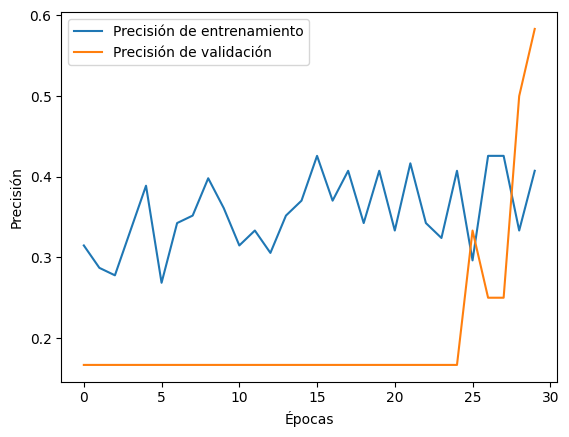

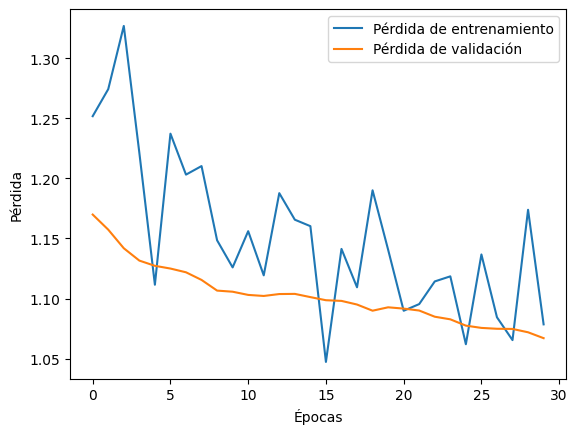

In [ ]:
# Graficar la precisión
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


### 2.Cambie la función de activación a `tanh`:

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

In [ ]:
# Crear el modelo MLP con Dropout
model = Sequential()
model.add(Dense(10, input_dim=4, activation='tanh'))
model.add(Dropout(0.5))  # Dropout con tasa del 50%
model.add(Dense(10, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))


In [ ]:

# Resumen del modelo
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 10)                50        
                                                                 
 dropout_30 (Dropout)        (None, 10)                0         
                                                                 
 dense_46 (Dense)            (None, 10)                110       
                                                                 
 dropout_31 (Dropout)        (None, 10)                0         
                                                                 
 dense_47 (Dense)            (None, 3)                 33        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=30, batch_size=5, validation_split=0.1)


Epoch 1/30
22/22 [==============================] - 1s 16ms/step - loss: 1.3617 - accuracy: 0.3056 - val_loss: 0.9643 - val_accuracy: 0.4167
Epoch 2/30
22/22 [==============================] - 0s 5ms/step - loss: 1.2380 - accuracy: 0.3519 - val_loss: 0.9408 - val_accuracy: 0.4167
Epoch 3/30
22/22 [==============================] - 0s 5ms/step - loss: 1.1957 - accuracy: 0.3611 - val_loss: 0.9267 - val_accuracy: 0.4167
Epoch 4/30
22/22 [==============================] - 0s 7ms/step - loss: 1.1375 - accuracy: 0.3981 - val_loss: 0.9178 - val_accuracy: 0.5000
Epoch 5/30
22/22 [==============================] - 0s 6ms/step - loss: 1.3006 - accuracy: 0.2407 - val_loss: 0.9118 - val_accuracy: 0.5833
Epoch 6/30
22/22 [==============================] - 0s 6ms/step - loss: 1.0795 - accuracy: 0.4352 - val_loss: 0.9062 - val_accuracy: 0.5833
Epoch 7/30
22/22 [==============================] - 0s 6ms/step - loss: 1.0729 - accuracy: 0.4167 - val_loss: 0.9005 - val_accuracy: 0.5000
Epoch 8/30
22/22 [=


#### Evaluación del Modelo

Evaluaremos el rendimiento del modelo utilizando los datos de prueba.



In [ ]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')


1/1 [==============================] - 0s 46ms/step - loss: 0.4938 - accuracy: 0.7667
Precisión en el conjunto de prueba: 76.67%


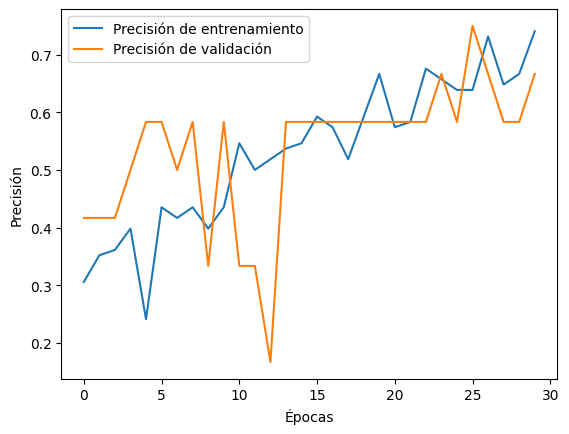

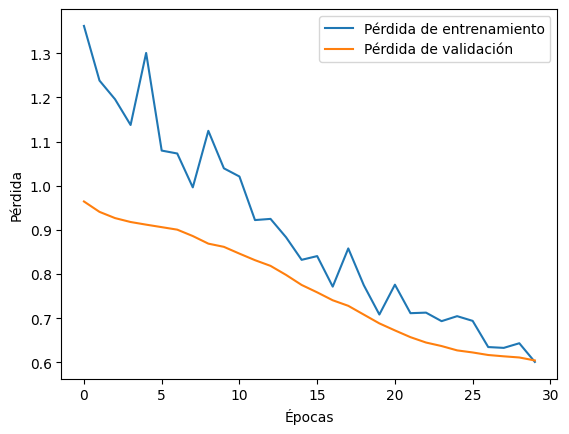

In [ ]:
# Graficar la precisión
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


### **Pregunta:**
- ¿Cómo afectan las diferentes funciones de activación en las capas ocultas a la precisión y la pérdida del modelo durante el entrenamiento y la validación?

AL cambiar el activador aumento la precision y disminuyo la perdida del modelo, quizas en este caso la funcion tanh esta capturando mejor la relacion de los datos que la sigmoid.